<a href="https://colab.research.google.com/github/toyin503/DATA-ANALYSIS-AND-VISUALIZATION/blob/main/Vancouver_crime_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DATA EXPLORATION OF THE VANCOUVER CRIME DATASET (2003-2017)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import sklearn

In [ ]:
# DATA PREPARATION AND TRANSFORMATION
# Upload dataset and show the first five rows
from google.colab import files

# choose the file on your computer to upload it then:
crimedata = pd.read_csv("/content/crime (1).csv")
crimedata.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [ ]:
# Show the number of rows and columns

print('number of rows in the dataset are : ', crimedata.shape[0], 'number of columns in the dataset are : ', crimedata.shape[1] )

number of rows in the dataset are :  519380 number of columns in the dataset are :  12


In [ ]:
#Show column names and datatype
crimedata.dtypes

TYPE              object
YEAR               int64
MONTH              int64
DAY                int64
HOUR             float64
MINUTE           float64
HUNDRED_BLOCK     object
NEIGHBOURHOOD     object
X                float64
Y                float64
Latitude         float64
Longitude        float64
dtype: object

In [ ]:
# Show the unique attributes of the dataset
crimedata.nunique()

TYPE                11
YEAR                15
MONTH               12
DAY                 31
HOUR                24
MINUTE              60
HUNDRED_BLOCK    21069
NEIGHBOURHOOD       24
X                91955
Y                90172
Latitude         97998
Longitude        95285
dtype: int64

In [ ]:
#Check for any null values
crimedata.isnull().sum()

TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR             53372
MINUTE           53372
HUNDRED_BLOCK       13
NEIGHBOURHOOD    55598
X                    0
Y                    0
Latitude             1
Longitude            1
dtype: int64

In [ ]:
# Drop the minutes columns as it is not required for this analysis
crimedata.drop(['MINUTE'], axis = 1, inplace=True)

In [ ]:
# Some columns have missing values as they have less rows than 530,652 : Hour, Hundred_Block and Neighbourhood
# As Hour is a float data type,fill with a dummy value of '100'. For others, fill with 'N/A'
crimedata['HOUR'].fillna(100, inplace = True)
crimedata['NEIGHBOURHOOD'].fillna('N/A', inplace = True)
crimedata['HUNDRED_BLOCK'].fillna('N/A', inplace = True)


In [ ]:
#Use function to_datetime to combine Year, Month, Day, into one column: Date
crimedata['DATE'] = pd.to_datetime({'year':crimedata['YEAR'], 'month':crimedata['MONTH'], 'day':crimedata['DAY']})

In [ ]:
# Day of the week is essential for this analysis. Use function dt.dayofweek (Monday=0 to Sunday=6) and add it as a column:'DAY_OF_WEEK'
crimedata['DAY_OF_WEEK'] = crimedata['DATE'].dt.dayofweek

In [ ]:
# Change the index to the column 'DATE' as this would aid analysis
crimedata.index = pd.DatetimeIndex(crimedata['DATE'])
crimedata.head()

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,DATE,DAY_OF_WEEK
DATE,,,,,,,,,,,,,
2003-05-12,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-05-12,0
2003-05-07,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-05-07,2
2003-04-23,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-04-23,2
2003-04-20,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-04-20,6
2003-04-12,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-04-12,5


In [ ]:
# The dataset is from 2003-01-01 to 2017-07-13, showing July 2017 is incomplete, this will be excluded from the analysis
crimedata = crimedata[crimedata['DATE'] < '2017-07-01']
crimedata.head()


,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,DATE,DAY_OF_WEEK
DATE,,,,,,,,,,,,,
2003-05-12,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-05-12,0
2003-05-07,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-05-07,2
2003-04-23,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-04-23,2
2003-04-20,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-04-20,6
2003-04-12,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-04-12,5


In [ ]:
# Show the crime type, year and their count in the dataset
count_type= crimedata[['NEIGHBOURHOOD','YEAR','TYPE']].groupby(['YEAR','NEIGHBOURHOOD']).count().reset_index(drop=False)
print(count_type)

     YEAR              NEIGHBOURHOOD  TYPE
0    2003              Arbutus Ridge   616
1    2003  Central Business District  9818
2    2003          Dunbar-Southlands   773
3    2003                   Fairview  3476
4    2003         Grandview-Woodland  3140
..    ...                        ...   ...
370  2017                 Strathcona   226
371  2017                     Sunset   136
372  2017        Victoria-Fraserview   112
373  2017                   West End   570
374  2017            West Point Grey    64

[375 rows x 3 columns]


In [ ]:
def group_data(df,col1,col2):
    subdata = df.groupby([col1,col2]).count().reset_index(drop=False)
    subdata = subdata[[col1,col2,'TYPE']]
    subdata.columns = [col1,col2,'Counts']
    return subdata
att_dept = group_data(crimedata,'NEIGHBOURHOOD','YEAR')
fig3=px.bar(att_dept,x='NEIGHBOURHOOD',y='Counts',color='YEAR',title='Total Crimes by Neighbourhood',color_discrete_sequence=['blue','red'])
fig3.show()

In [ ]:
# Highest count of crime ouccured in Central Business District and West End while the lowest count of crime is in  Musqueam followed by Stanley Park

In [ ]:
# Show the occurrence of each crime in the dataset
crimedata['TYPE'].value_counts().sort_index()

Break and Enter Commercial                                 33014
Break and Enter Residential/Other                          60205
Homicide                                                     212
Mischief                                                   68419
Offence Against a Person                                   53116
Other Theft                                                50403
Theft from Vehicle                                        168777
Theft of Bicycle                                           25090
Theft of Vehicle                                           37970
Vehicle Collision or Pedestrian Struck (with Fatality)       250
Vehicle Collision or Pedestrian Struck (with Injury)       21444
Name: TYPE, dtype: int64

In [ ]:
# Grouping  Break and Enter crimes, Theft crimes and Vehicle Collision crimes
def category(crime_type):
    if 'Theft' in crime_type:
        return 'Theft'
    elif 'Break' in crime_type:
        return 'Break and Enter'
    elif 'Collision' in crime_type:
        return 'Vehicle Collision'
    else:
        return 'Others'
crimedata['CATEGORY'] = crimedata['TYPE'].apply(category)
crimedata.head()

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,DATE,DAY_OF_WEEK,CATEGORY
DATE,,,,,,,,,,,,,,
2003-05-12,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-05-12,0,Theft
2003-05-07,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-05-07,2,Theft
2003-04-23,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-04-23,2,Theft
2003-04-20,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-04-20,6,Theft
2003-04-12,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-04-12,5,Theft


In [ ]:
# Show the occurrence of each crime in the dataset
crimedata['TYPE'].value_counts().sort_index()

Break and Enter Commercial                                 33014
Break and Enter Residential/Other                          60205
Homicide                                                     212
Mischief                                                   68419
Offence Against a Person                                   53116
Other Theft                                                50403
Theft from Vehicle                                        168777
Theft of Bicycle                                           25090
Theft of Vehicle                                           37970
Vehicle Collision or Pedestrian Struck (with Fatality)       250
Vehicle Collision or Pedestrian Struck (with Injury)       21444
Name: TYPE, dtype: int64

In [ ]:
# Histogram shows a normal distribution with around 92 crimes each day

<ipython-input-21-af8b16f55b39>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




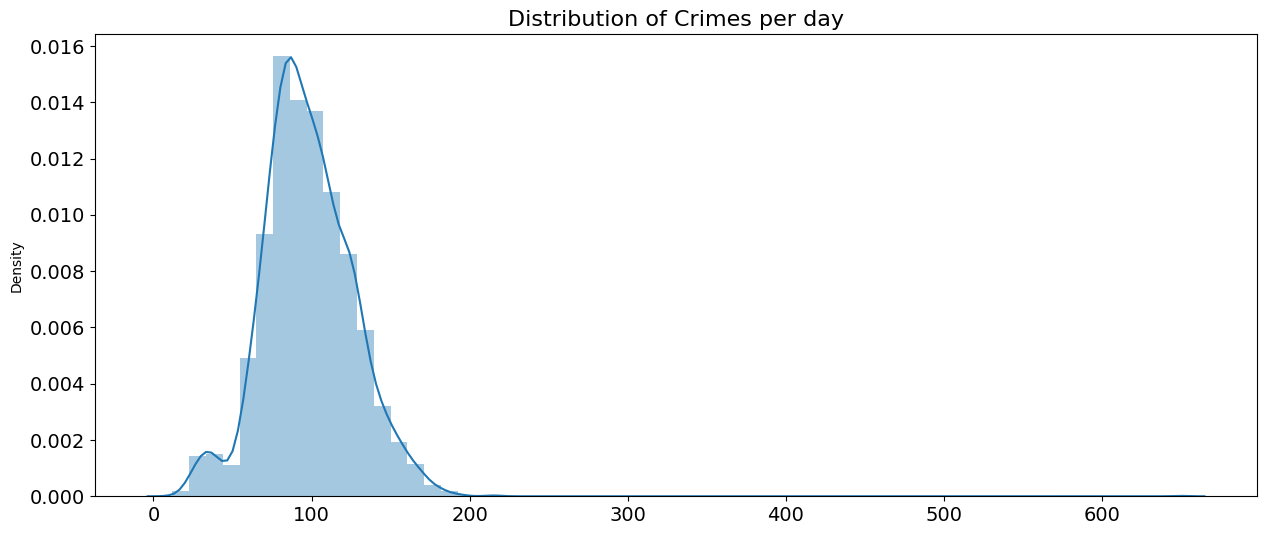

In [ ]:
# DATA EXPLORATION WITH HISTOGRAM
plt.figure(figsize=(15,6))
plt.title('Distribution of Crimes per day', fontsize=16)
plt.tick_params(labelsize=14)
sns.distplot(crimedata.resample('D').size(), bins=60);


In [ ]:
# Histogram shows a normal distribution with an average of about 92 crimes each day with an outlier in the distribution above 600

In [ ]:
# Ascertain the day the outlier crime occured
crimedata.resample('D').size().idxmax()

Timestamp('2011-06-15 00:00:00', freq='D')

In [ ]:
# The crime occurred 15th June 2011

In [ ]:
# Show crime occurrence each year
year_crime = crimedata[['YEAR','TYPE']]
year_crime = year_crime.groupby('YEAR').count().reset_index(drop=False)
year_crime.columns = ['YEAR', 'Counts']
fig = px.line(year_crime, x='YEAR',y='Counts',title='Number of Crimes in Vancouver')
fig.show()

In [ ]:
# Crime count was at its highest in 2003 at 50,000 and gradually declined from then to 2012. In 2013, crime count began to rise and was at a peak in 2016 at 37,500, before sharply declining after that year.

In [ ]:
'''# Show the crime type which has the highest occurrence
type_crime = pd.DataFrame(crimedata['TYPE']).value_counts().reset_index(drop=False)
type_crime.columns = ['TYPE', 'Counts']
fig3=px.bar(type_crime,x='TYPE',y='Counts',title='Total Crimes by Neighbourhood',color_discrete_sequence=['blue','red'])
fig3.show()'''

"# Show the crime type which has the highest occurrence\ntype_crime = pd.DataFrame(crimedata['TYPE']).value_counts().reset_index(drop=False)\ntype_crime.columns = ['TYPE', 'Counts']\nfig3=px.bar(type_crime,x='TYPE',y='Counts',title='Total Crimes by Neighbourhood',color_discrete_sequence=['blue','red'])\nfig3.show()"

In [ ]:
# Crime of Theft from Vehicle has the highest occurrence around 160,000 while the lowest occurring crimes was Vehicle collision or Pedestrian struck with fatlaity and Homicide

In [ ]:
# Show crime occurrence each day
# Using the upper control limit(ucl) and lower control limit(lcl)
'''crimes_daily = pd.DataFrame(crimedata[crimedata['DATE'] != '2011-06-15'].resample('D').size())
crimes_daily['MEAN'] = crimedata[crimedata['DATE'] != '2011-06-15'].resample('D').size().mean()
crimes_daily['STD'] = crimedata[crimedata['DATE'] != '2011-06-15'].resample('D').size().std()
UCL = crimes_daily['MEAN'] + 3 * crimes_daily['STD']
LCL = crimes_daily['MEAN'] - 3 * crimes_daily['STD']

# Plot graph of Total crimes each day, ucl, lcl and Moving-average
plt.figure(figsize=(18,6))
crimedata.resample('D').size().plot(label='Crimes per day')
UCL.plot(color='red', ls='--', linewidth=1.5, label='UCL')
LCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')
crimes_daily['MEAN'].plot(color='red', linewidth=2, label='Average')
plt.title('Total crimes per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':14});'''

"crimes_daily = pd.DataFrame(crimedata[crimedata['DATE'] != '2011-06-15'].resample('D').size())\ncrimes_daily['MEAN'] = crimedata[crimedata['DATE'] != '2011-06-15'].resample('D').size().mean()\ncrimes_daily['STD'] = crimedata[crimedata['DATE'] != '2011-06-15'].resample('D').size().std()\nUCL = crimes_daily['MEAN'] + 3 * crimes_daily['STD']\nLCL = crimes_daily['MEAN'] - 3 * crimes_daily['STD']\n\n# Plot graph of Total crimes each day, ucl, lcl and Moving-average\nplt.figure(figsize=(18,6))\ncrimedata.resample('D').size().plot(label='Crimes per day')\nUCL.plot(color='red', ls='--', linewidth=1.5, label='UCL')\nLCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')\ncrimes_daily['MEAN'].plot(color='red', linewidth=2, label='Average')\nplt.title('Total crimes per day', fontsize=16)\nplt.xlabel('Day')\nplt.ylabel('Number of crimes')\nplt.tick_params(labelsize=14)\nplt.legend(prop={'size':14});"

In [ ]:
# The number of crimes between 2003 and 2008, is above average with a spike upwards just after 2008. On June 2011, there is a huge spike above average

In [ ]:
# Analyse the spike on June 2011 by showing how many crimes occurred and their crime types
len(crimedata['2011-06'])
crimedata['2011-06']['TYPE'].value_counts().head(5)


<ipython-input-31-9f26686831fe>:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-31-9f26686831fe>:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



Mischief                      809
Theft from Vehicle            521
Offence Against a Person      314
Break and Enter Commercial    303
Other Theft                   301
Name: TYPE, dtype: int64

In [ ]:
# Show number of crimes per neighbourhood
crimedata['2011-06']['NEIGHBOURHOOD'].value_counts().head(5)

<ipython-input-32-8d09501419e3>:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



Central Business District    996
N/A                          322
West End                     189
Mount Pleasant               139
Renfrew-Collingwood          125
Name: NEIGHBOURHOOD, dtype: int64

In [ ]:
# Central business district (CBD) has the highest number of crimes that month in 2011

In [ ]:
# Check how many crimes per day
crimedata['2011-06']['DATE'].value_counts().head(5)


<ipython-input-34-c186715c9e14>:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



2011-06-15    649
2011-06-16    111
2011-06-10    110
2011-06-17    105
2011-06-18    103
Name: DATE, dtype: int64

In [ ]:
# The highest number of crimes occurred on the 15th of June in 2011, at 649 which was a huge increase from 111 crimes a day before

In [ ]:
# The information accessed online is that in Vancouver, there was a public riot: Stanley Cup riots which occurred after a Hockey game. Cars and businesses were destroyed which explains the high occurrence of crimes of Mischief

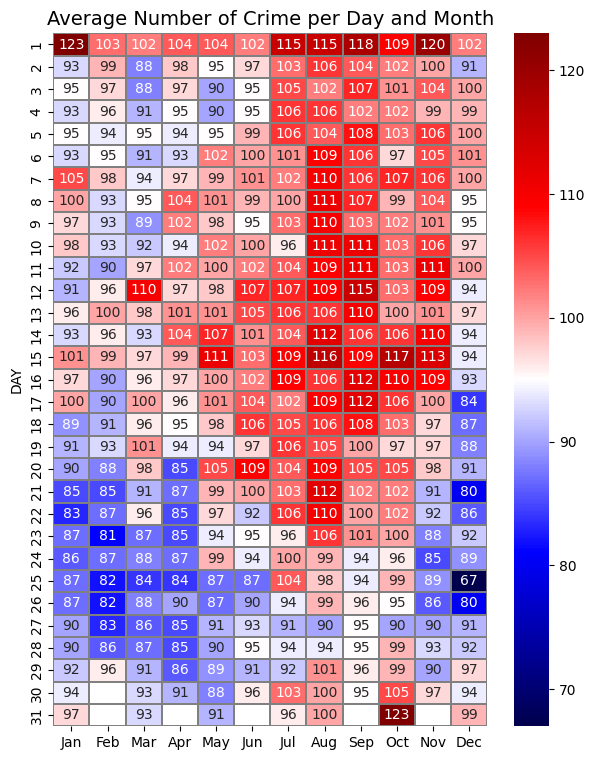

In [ ]:
# Show the days with highest and lowest average of crime occurrences using Pivot table
crimedata_pivot_table = crimedata[(crimedata['DATE'] != '2011-06-15')].pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=len)
crimedata_pivot_table_year_count = crimedata[(crimedata['DATE'] != '2011-06-15')].pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=lambda x: len(x.unique()))
crimedata_average = crimedata_pivot_table/crimedata_pivot_table_year_count
crimedata_average.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']



# Show the plot
plt.show()
plt.figure(figsize=(7,9))
plt.title('Average Number of Crime per Day and Month', fontsize=14)
# Add a colorbar with a legend


sns.heatmap(crimedata_average.round(), cmap='seismic', linecolor='grey',linewidths=0.1, cbar=True, annot=True, fmt=".0f");


In [ ]:
# Red depicts high average of crime occurrences, Blue depicts low average and white is in between the two. Black depicts very low crime occurrence and dark red, very high crime occurrence
# December 25th on average has low number of crimes occurring while January 1st and October 31st (Halloweeen) on average has very high occurrence of crimes. April to October which is around Summer, shows high average of crimes


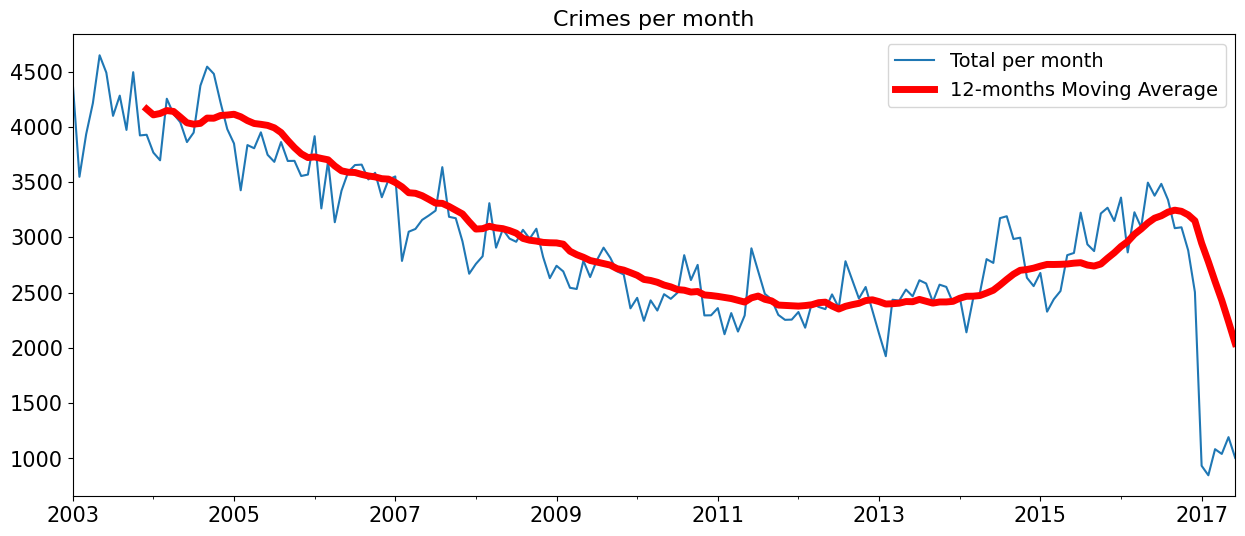

In [ ]:
# Show the months with highest and lowest average of crime occurrences with a Moving average
# Use resample 'M' and rolling window '12'
plt.figure(figsize=(15,6))
crimedata.resample('M').size().plot(label='Total per month')
crimedata.resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=5, label='12-months Moving Average')

plt.title('Crimes per month', fontsize=16)
plt.xlabel('')
plt.legend(prop={'size':14})
plt.tick_params(labelsize=15);

In [ ]:
# Crimes decreased from around 4000 in 2003 to 2500 in 2011 and had the same moving average from 2011 to 2014. There was an increase from 2014 to 2017 which then declined thereafter.

In [ ]:
# As there is an index and column with the same label: 'DATE', set index name as none to avoid error: 'DATE' is both an index level and a column label, which is ambiguous:
crimedata.index.name=None

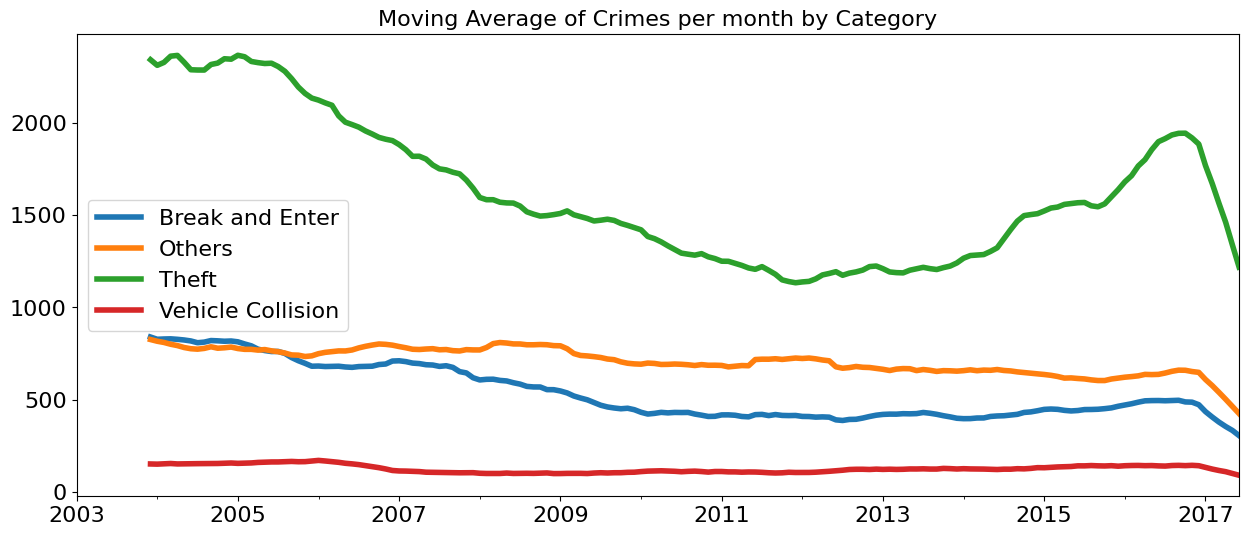

In [ ]:
# Show the months per categories of crimes with a Moving average
# Use resample 'M' and rolling window '12'
crimedata['date'] = crimedata.index
crimedata.pivot_table(values='TYPE', index='DATE', columns='CATEGORY', aggfunc=len).resample('M').sum().rolling(window=12).mean().plot(figsize=(15,6), linewidth=4)
plt.title('Moving Average of Crimes per month by Category', fontsize=16)
plt.xlabel('')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

In [ ]:
# The Category Theft has a high occurrence around November 2003 at above 2000 which declined to about 1,200 around October 2011.This increased from 2013 to 2016 and reduced from the start of 2017
# Vehicle Collision had the lowest occurrence at about 200 in November 2003 and declined slighlty from the beginning of 2006 to January 2007. There was no sharp increase from 2007 to 2017 as the occurrences of crimes in this category remained at around 150
# Break and Enter and the crimes in the Category: Others were occurring at about 800 at around the end of 2003 and Break and Enter occurrences dropped 2006, rose slightly in 2007 and reduced till ending of 2016. Like Theft, it fell slightly in 2017 beginning
# Others occurred within the same range of about 700 to 800 from 2003 to 2017 but unlike the other 3 categories, it increased slightly in occurrence from around 2017

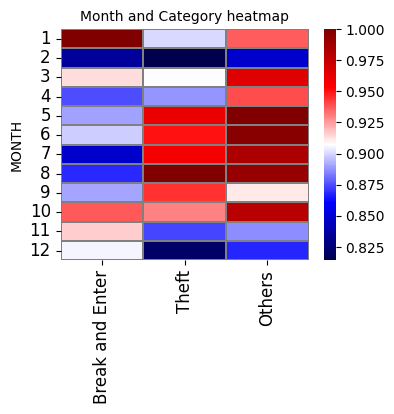

In [ ]:
# Using a pivot table to visualise the months per categories of crime
crimedata_pivot_table = crimedata.pivot_table(values='TYPE', index='CATEGORY', columns='MONTH', aggfunc=len)

# To compare categories, scale each category by diving by the max value of each one
crimedata_scaled = pd.DataFrame(crimedata_pivot_table.iloc[0] / crimedata_pivot_table.iloc[0].max())

# Using a for loop to scale category Others
for i in [2,1]:
    crimedata_scaled[crimedata_pivot_table.index[i]] =  pd.DataFrame(crimedata_pivot_table.iloc[i] / crimedata_pivot_table.iloc[i].max())


plt.figure(figsize=(4,3))
plt.title('Month and Category heatmap', fontsize=10)

plt.tick_params(labelsize=12)
sns.heatmap(crimedata_scaled, cmap='seismic', linecolor='grey',linewidths=0.1, cbar=True);


In [ ]:
# Combining date features and creating category of 'DAYOFWEEK'
# Add "NeighbourhoodID" column as a category key ID for 'NEIGHBOURHOOD'
# Add "CrimeTypeID" column as a category key ID for "TYPE"
# Add "Incident" column as a row count per crime type

crimedata['Date'] = pd.to_datetime({'year':crimedata['YEAR'], 'month':crimedata['MONTH'], 'day':crimedata['DAY']})
crimedata['DayOfWeek'] = crimedata['Date'].dt.day_name()
crimedata['DayOfWeekID'] = crimedata['Date'].dt.weekday
crimedata['NeighbourhoodID'] = crimedata.groupby('NEIGHBOURHOOD').ngroup().add(1)
crimedata['CrimeTypeID'] = crimedata.groupby('TYPE').ngroup().add(1)
crimedata['Incident'] = 1
crimedata.head()

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,...,DATE,DAY_OF_WEEK,CATEGORY,date,Date,DayOfWeek,DayOfWeekID,NeighbourhoodID,CrimeTypeID,Incident
2003-05-12,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,...,2003-05-12,0,Theft,2003-05-12,2003-05-12,Monday,0,21,6,1
2003-05-07,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,...,2003-05-07,2,Theft,2003-05-07,2003-05-07,Wednesday,2,21,6,1
2003-04-23,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,...,2003-04-23,2,Theft,2003-04-23,2003-04-23,Wednesday,2,21,6,1
2003-04-20,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,...,2003-04-20,6,Theft,2003-04-20,2003-04-20,Sunday,6,21,6,1
2003-04-12,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,...,2003-04-12,5,Theft,2003-04-12,2003-04-12,Saturday,5,21,6,1


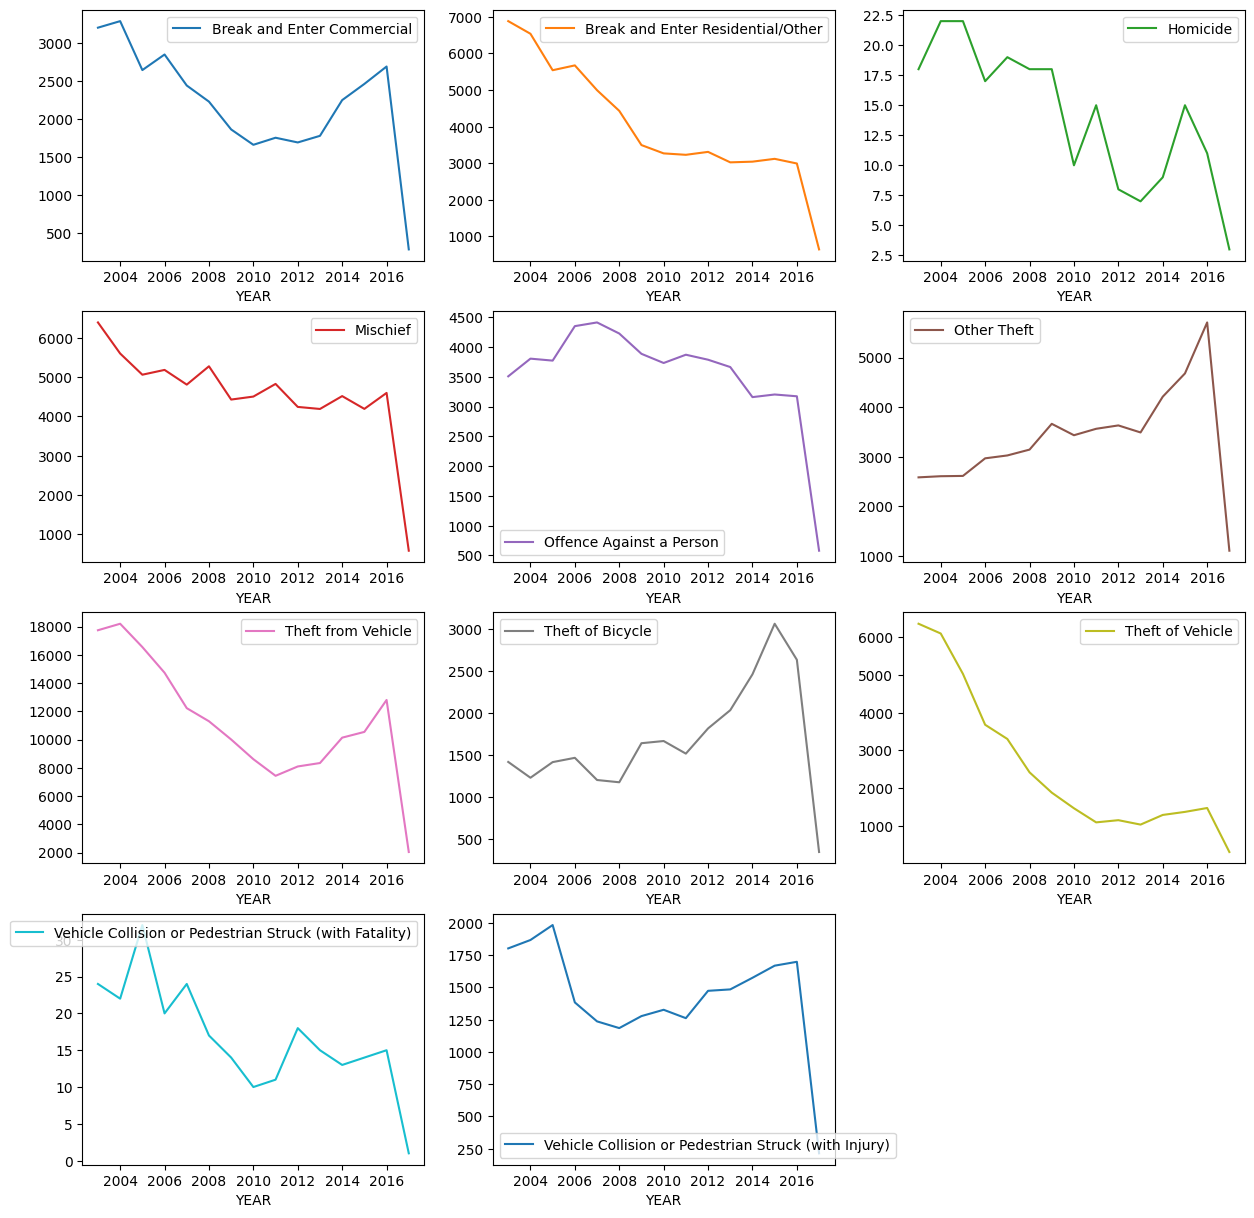

In [ ]:
# Show crime types each year
%matplotlib inline
# Crime count by Category per year
CrimeDate = crimedata.pivot_table(values='Incident'
                                     ,aggfunc=np.size
                                     ,columns='TYPE'
                                     ,index='YEAR'
                                     ,fill_value=0)
plo = CrimeDate.plot(figsize=(15, 15), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

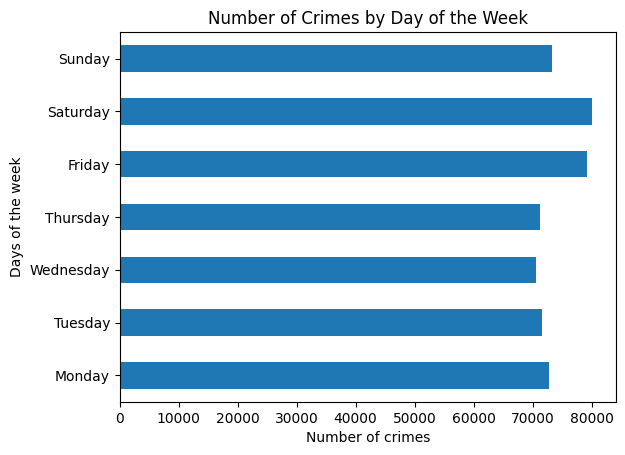

In [ ]:
# Show number of crimes per day of week
%matplotlib inline
# Adding Days Lookup
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']

# Grouping dataframe by Day of Week ID and plotting
crimedata.groupby(crimedata["DayOfWeekID"]).size().plot(kind='barh')

# Customizing Plot
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of Crimes by Day of the Week')
plt.show()

In [ ]:
crimedataRandomF = crimedata
crimedata.drop(['Latitude'], axis = 1, inplace=True)
crimedata.drop(['Longitude'], axis = 1, inplace=True)
crimedata.head()


,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,DATE,DAY_OF_WEEK,CATEGORY,date,Date,DayOfWeek,DayOfWeekID,NeighbourhoodID,CrimeTypeID,Incident
2003-05-12,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,2003-05-12,0,Theft,2003-05-12,2003-05-12,Monday,0,21,6,1
2003-05-07,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,2003-05-07,2,Theft,2003-05-07,2003-05-07,Wednesday,2,21,6,1
2003-04-23,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,2003-04-23,2,Theft,2003-04-23,2003-04-23,Wednesday,2,21,6,1
2003-04-20,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,2003-04-20,6,Theft,2003-04-20,2003-04-20,Sunday,6,21,6,1
2003-04-12,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,2003-04-12,5,Theft,2003-04-12,2003-04-12,Saturday,5,21,6,1


# New section

In [ ]:
# MACHINE LEARNING MODELLING

# New DataFrame to filter out columns needed
crimedataRandomF = crimedata

# Split data for training and testing
# CrimedataRandomF['train'] = np.random.uniform(0, 1, len(dfRandomF)) <= .70

X = crimedataRandomF[['YEAR', 'MONTH', 'DAY','HOUR', 'NeighbourhoodID']]

Y = crimedataRandomF[['CrimeTypeID']]



# To create a training and testing set, split the data
# 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 5)

print('Number of observations and columns in the training data:', X_train.shape, y_train.shape)
print('Number of observations and columns in the testing data:',X_test.shape, y_test.shape)

Number of observations and columns in the training data: (363230, 5) (363230, 1)
Number of observations and columns in the testing data: (155670, 5) (155670, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

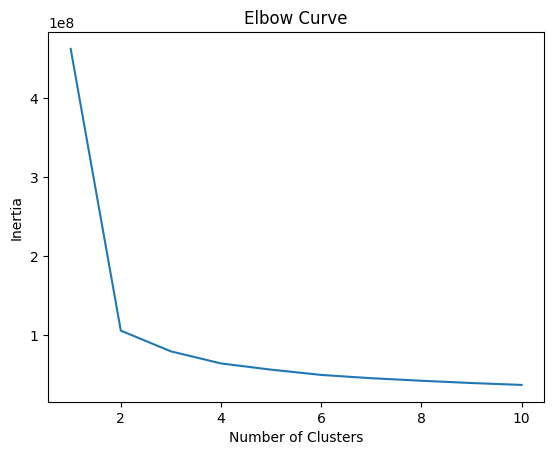

In [ ]:
# UNSUPERVISED MACHINE LEARNING MODELLING USING K-MEANS CLUSTERING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to determine the optimal number of clusters
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()



In [ ]:
import pandas as pd

import numpy as np

import seaborn

import matplotlib.pyplot as plt

%matplotlib inline

model = KMeans(n_clusters=2)

In [ ]:
 kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
 kmeans.labels_

array([1, 1, 1, ..., 0, 0, 1], dtype=int32)

In [ ]:
# Add the cluster labels to the original dataset
X['Clusters']=kmeans.labels_

# Analyze and interpret the clusters
cluster_counts = X['Clusters'].value_counts()
print(cluster_counts)
plt.show()

1    465572
0     53328
Name: Clusters, dtype: int64


<ipython-input-53-476b9d9014ac>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-54-559f8d020be1>:2: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



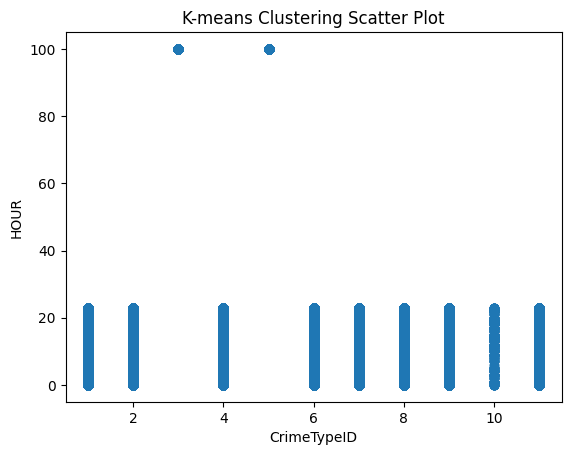

In [ ]:
# Scatter plot of the data points colored by cluster
plt.scatter(crimedataRandomF[['CrimeTypeID']], crimedataRandomF[['HOUR']], cmap='viridis')

# Add labels and title
plt.xlabel('CrimeTypeID')
plt.ylabel('HOUR')
plt.title('K-means Clustering Scatter Plot')

# Show the plot
plt.show()

In [ ]:
 kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X)
 kmeans.labels_

array([3, 3, 3, ..., 0, 0, 1], dtype=int32)

In [ ]:
# Add the cluster labels to the original dataset
X['Clusters']=kmeans.labels_

# Analyze and interpret the clusters
cluster_counts = X['Clusters'].value_counts()
print(cluster_counts)
plt.show()

2    167776
1    161182
3    136614
0     53328
Name: Clusters, dtype: int64


<ipython-input-56-476b9d9014ac>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CrimeTypeID's values is unknown.


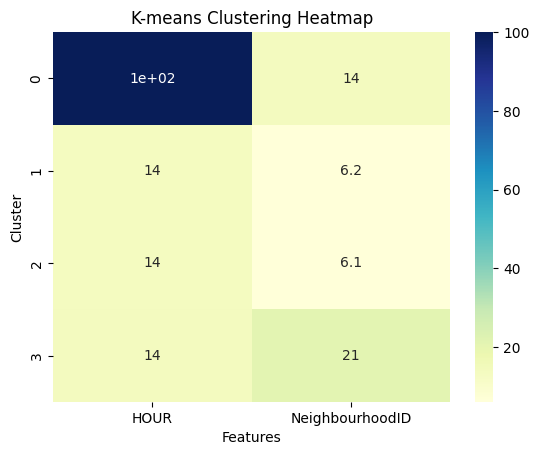

In [ ]:
# Create a pivot table to aggregate the data by cluster and features
values = crimedata.get('CrimeTypeID', None)  # 'None' is the default value if 'id' key is not present
# perform further operations with the value
if 'CrimeTypeID' in values:
    value = values['CrimeTypeID']
    # perform further operations with the value
else:
     print(f"{'CrimeTypeID'}'s values is unknown.")
pivot_table = pd.pivot_table(X, index='Clusters', values=('NeighbourhoodID','HOUR'), aggfunc='mean')

# Create a heatmap of the pivot table
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.title('K-means Clustering Heatmap')

# Show the plot
plt.show()

In [ ]:
# MACHINE LEARNING MODELLING

# New DataFrame to filter out columns needed
crimedataRandomF = crimedata

# Split data for training and testing
# CrimedataRandomF['train'] = np.random.uniform(0, 1, len(dfRandomF)) <= .70

X = crimedataRandomF[['YEAR', 'MONTH', 'DAY','HOUR', 'NeighbourhoodID']]

Y = crimedataRandomF[['TYPE']]



# To create a training and testing set, split the data
# 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 5)

print('Number of observations and columns in the training data:', X_train.shape, y_train.shape)
print('Number of observations and columns in the testing data:',X_test.shape, y_test.shape)

Number of observations and columns in the training data: (363230, 5) (363230, 1)
Number of observations and columns in the testing data: (155670, 5) (155670, 1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
clf = DecisionTreeClassifier()
clf.fit(X,Y)
importances =  clf.feature_importances_

feature_importances_=pd.DataFrame({'Feature': X.columns,  'Feature of Importance' : importances})
top_features = feature_importances_['Feature'].tolist()
print("Sorted feature importance in ascending order:")
print(feature_importances_.head())

Sorted feature importance in ascending order:
           Feature  Feature of Importance
0             YEAR               0.115874
1            MONTH               0.199838
2              DAY               0.357917
3             HOUR               0.275630
4  NeighbourhoodID               0.050740


<Axes: xlabel='index', ylabel='score'>

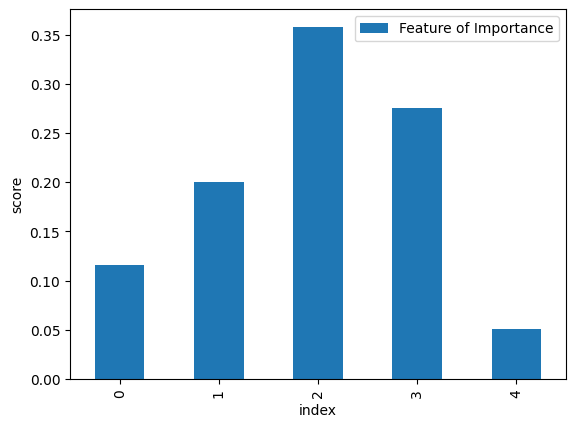

In [ ]:
feature_importances_.head().plot(kind='bar', xlabel = 'index', ylabel = 'score')

In [ ]:
prep_data=crimedata
prep_data.loc[:,'Theft'] = prep_data['TYPE']
prep_data.loc[crimedata['Theft'] != 'Theft', 'Theft'] = 0
prep_data.loc[crimedata['Theft'] == 'Theft', 'Theft'] = 1
prep_data['NEIGHBOURHOOD'].replace('\s+', '_',regex=True,inplace=True)
prep_data = prep_data.dropna(subset=['NEIGHBOURHOOD', 'CATEGORY','DATE','date','DayOfWeek','HUNDRED_BLOCK'], inplace=True)
prep_data
from sklearn.preprocessing import StandardScaler, LabelBinarizer, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
scaler = StandardScaler()
lb = LabelBinarizer()
target = 'TYPE'
from sklearn import metrics
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.3269929980086079


In [ ]:
crimedata.pop('NEIGHBOURHOOD')
crimedata.pop('date')
crimedata.pop('Date')
crimedata.pop('TYPE')
crimedata.pop('HOUR')
crimedata.head()

,YEAR,MONTH,DAY,HUNDRED_BLOCK,X,Y,DATE,DAY_OF_WEEK,CATEGORY,DayOfWeek,DayOfWeekID,NeighbourhoodID,CrimeTypeID,Incident,Theft
2003-05-12,2003,5,12,9XX TERMINAL AVE,493906.5,5457452.47,2003-05-12,0,Theft,Monday,0,21,6,1,0
2003-05-07,2003,5,7,9XX TERMINAL AVE,493906.5,5457452.47,2003-05-07,2,Theft,Wednesday,2,21,6,1,0
2003-04-23,2003,4,23,9XX TERMINAL AVE,493906.5,5457452.47,2003-04-23,2,Theft,Wednesday,2,21,6,1,0
2003-04-20,2003,4,20,9XX TERMINAL AVE,493906.5,5457452.47,2003-04-20,6,Theft,Sunday,6,21,6,1,0
2003-04-12,2003,4,12,9XX TERMINAL AVE,493906.5,5457452.47,2003-04-12,5,Theft,Saturday,5,21,6,1,0


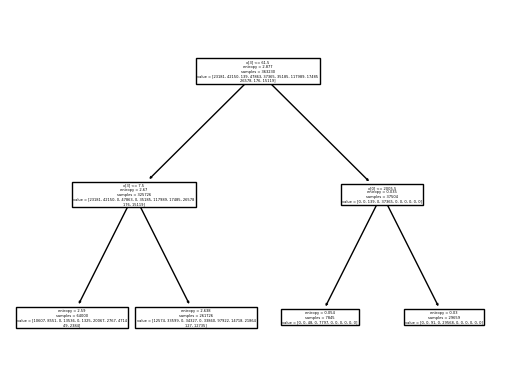

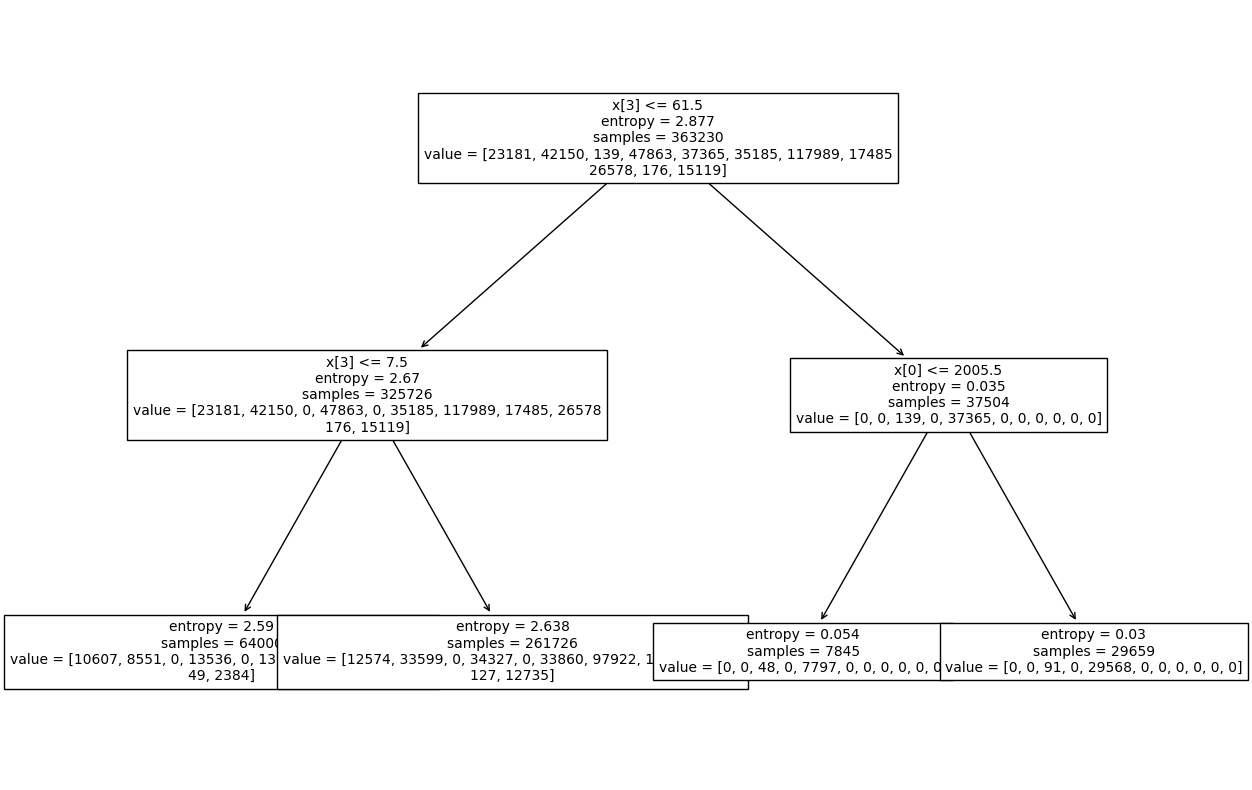

In [ ]:
# Fit Decision Tree to the crime data, include attribute: 'entropy' and visualise the tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf= clf.fit(X_train, y_train)
tree.plot_tree(clf)
plt.figure(figsize=(15,10))
tree.plot_tree(clf, fontsize=10)
plt.show()

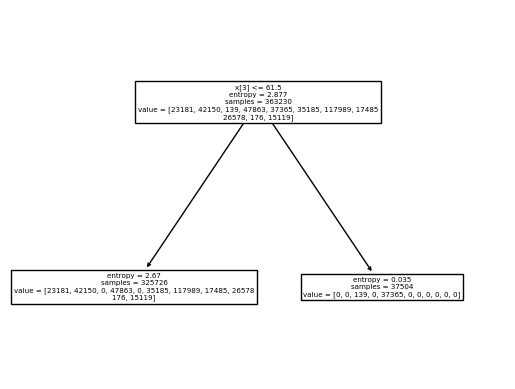

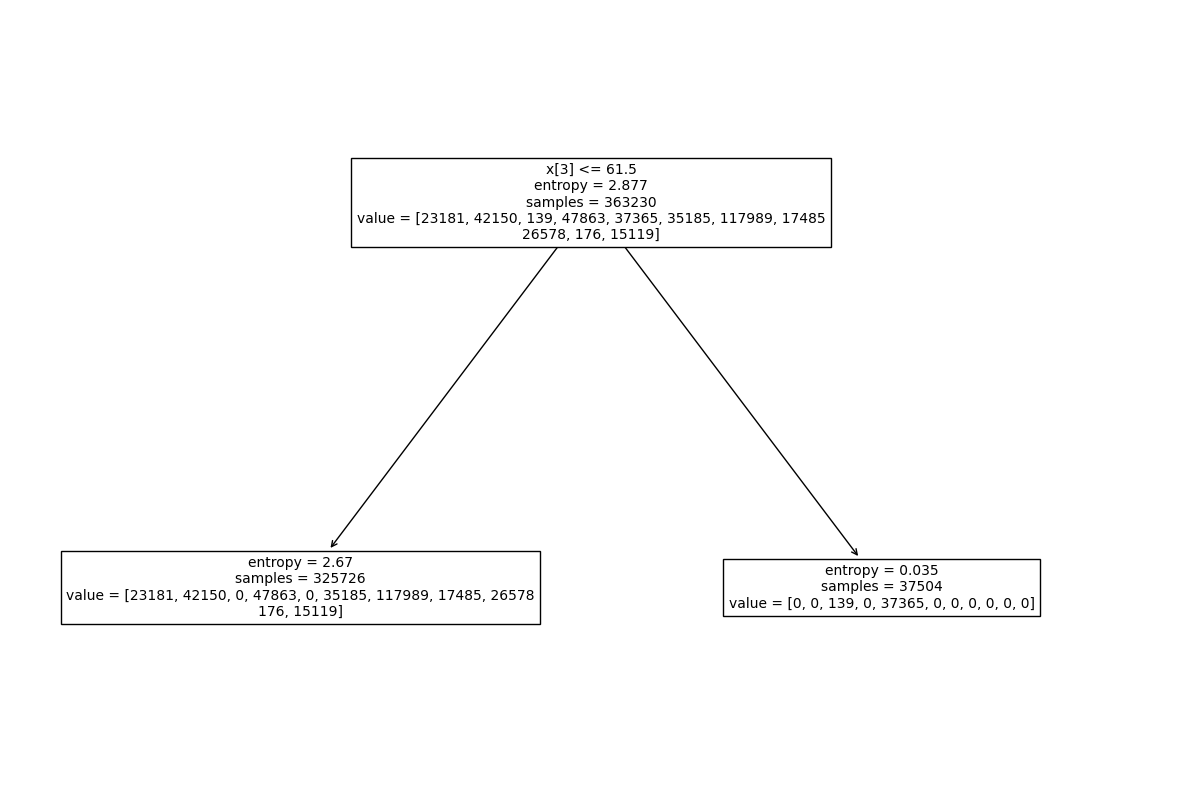

In [ ]:
# Prune Decision Tree to the crime data, include attribute: 'entropy' and visualise the tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2, ccp_alpha= 0.1)
clf= clf.fit(X_train, y_train)
tree.plot_tree(clf)
plt.figure(figsize=(15,10))
tree.plot_tree(clf, fontsize=10)
plt.show()



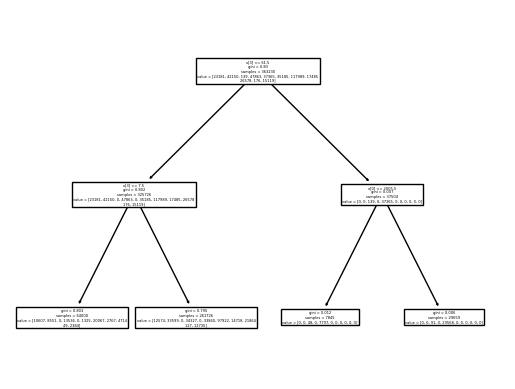

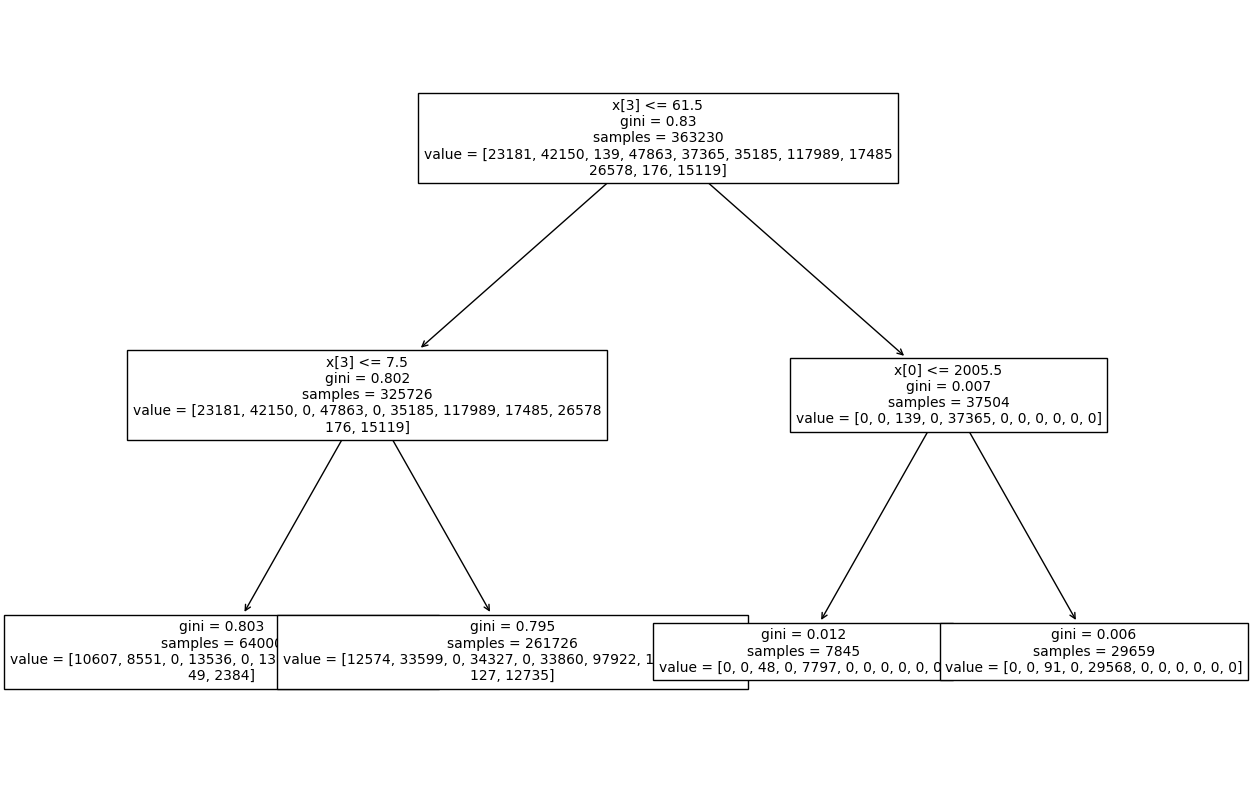

In [ ]:
# Fit Decision Tree to the crime data, include attribute: 'gini' and visualise the tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=2)
clf= clf.fit(X_train, y_train)
tree.plot_tree(clf)
plt.figure(figsize=(15,10))
tree.plot_tree(clf, fontsize=10)
plt.show()

In [ ]:
# Improving the prediction accuracy of DT
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4274362433352605


In [ ]:
# DT prediction accuracy improved with the attribute: 'entropy' from 32.97% to around 42%

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4274362433352605


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

<function confusion_matrix at 0x7f72abc85ab0>


In [ ]:
crimedata.head()

,YEAR,MONTH,DAY,HUNDRED_BLOCK,X,Y,DATE,DAY_OF_WEEK,CATEGORY,DayOfWeek,DayOfWeekID,NeighbourhoodID,CrimeTypeID,Incident,Theft
2003-05-12,2003,5,12,9XX TERMINAL AVE,493906.5,5457452.47,2003-05-12,0,Theft,Monday,0,21,6,1,0
2003-05-07,2003,5,7,9XX TERMINAL AVE,493906.5,5457452.47,2003-05-07,2,Theft,Wednesday,2,21,6,1,0
2003-04-23,2003,4,23,9XX TERMINAL AVE,493906.5,5457452.47,2003-04-23,2,Theft,Wednesday,2,21,6,1,0
2003-04-20,2003,4,20,9XX TERMINAL AVE,493906.5,5457452.47,2003-04-20,6,Theft,Sunday,6,21,6,1,0
2003-04-12,2003,4,12,9XX TERMINAL AVE,493906.5,5457452.47,2003-04-12,5,Theft,Saturday,5,21,6,1,0


In [ ]:
prep_data=crimedata
prep_data.loc[:,'Theft'] = prep_data['CATEGORY']
prep_data.loc[crimedata['Theft'] != 'Theft', 'Theft'] = 0
prep_data.loc[crimedata['Theft'] == 'Theft', 'Theft'] = 1
prep_data

,YEAR,MONTH,DAY,HUNDRED_BLOCK,X,Y,DATE,DAY_OF_WEEK,CATEGORY,DayOfWeek,DayOfWeekID,NeighbourhoodID,CrimeTypeID,Incident,Theft
2003-05-12,2003,5,12,9XX TERMINAL AVE,493906.50,5457452.47,2003-05-12,0,Theft,Monday,0,21,6,1,1
2003-05-07,2003,5,7,9XX TERMINAL AVE,493906.50,5457452.47,2003-05-07,2,Theft,Wednesday,2,21,6,1,1
2003-04-23,2003,4,23,9XX TERMINAL AVE,493906.50,5457452.47,2003-04-23,2,Theft,Wednesday,2,21,6,1,1
2003-04-20,2003,4,20,9XX TERMINAL AVE,493906.50,5457452.47,2003-04-20,6,Theft,Sunday,6,21,6,1,1
2003-04-12,2003,4,12,9XX TERMINAL AVE,493906.50,5457452.47,2003-04-12,5,Theft,Saturday,5,21,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-29,2017,3,29,RICHARDS ST / W GEORGIA ST,491549.42,5458724.17,2017-03-29,2,Theft,Wednesday,2,2,7,1,1
2017-05-01,2017,5,1,1XX E HASTINGS ST,492708.13,5458743.35,2017-05-01,0,Others,Monday,0,2,4,1,0
2017-01-07,2017,1,7,OFFSET TO PROTECT PRIVACY,0.00,0.00,2017-01-07,5,Others,Saturday,5,14,5,1,0
2017-04-29,2017,4,29,OFFSET TO PROTECT PRIVACY,0.00,0.00,2017-04-29,5,Others,Saturday,5,14,5,1,0


In [ ]:
numerical_features = prep_data.select_dtypes(include=[np.number]).columns
categorical_features = prep_data.select_dtypes(include=[np.object]).columns
categorical_features = categorical_features.drop(['HUNDRED_BLOCK'])
target = 'TYPE'

<ipython-input-72-3710f2705ecc>:2: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
scaler = StandardScaler()
lb = LabelBinarizer()
numeric_scaled = scaler.fit_transform(prep_data[numerical_features])

In [ ]:
le = LabelEncoder()
labels = le.fit_transform(prep_data['CATEGORY'])
X_train, X_test, y_train,y_test = train_test_split(X_test,y_test)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
clf.score(X_train,y_train)

0.9655766068247225

In [ ]:
clf.score(X_test, y_test)

0.3205457628860681

In [ ]:
# Optimising the DT

In [ ]:
# Prediction test for DT with 'gini' index
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 5,
                               max_depth=5, min_samples_leaf=8)
clf_gini.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.3205457628860681


In [ ]:
# Prediction test for DT with criterion 'entropy' which is for information gain
y_pred_gn = clf_gini.predict(X_test)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 5,
                                    max_depth=5, min_samples_leaf=8)
clf_entropy.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3205457628860681


In [ ]:
# Accuracy is the same value with criteria: 'gini' and 'entropy', as before at 32.79%

In [ ]:
# Prediction test
y_pred_en = clf_entropy.predict(X_test)

In [ ]:
# Random values for crime prediction
clf_gini.predict(X_train)

array(['Theft from Vehicle', 'Theft from Vehicle',
       'Offence Against a Person', ..., 'Theft from Vehicle',
       'Theft from Vehicle', 'Break and Enter Commercial'], dtype=object)

In [ ]:
# Using the same parameters for crime prediction
dfpred = crimedata
dfpred[(dfpred['YEAR'] == 2017) &
        (dfpred['MONTH'] == 1) &
        (dfpred['DAY'] == 5) &
        (dfpred['NeighbourhoodID'] == 12)]

,YEAR,MONTH,DAY,HUNDRED_BLOCK,X,Y,DATE,DAY_OF_WEEK,CATEGORY,DayOfWeek,DayOfWeekID,NeighbourhoodID,CrimeTypeID,Incident,Theft
2017-01-05,2017,1,5,4XX E 6TH AVE,493142.36,5456944.35,2017-01-05,3,Break and Enter,Thursday,3,12,2,1,0
2017-01-05,2017,1,5,1XX W 1ST AVE,492084.79,5457519.47,2017-01-05,3,Theft,Thursday,3,12,7,1,1


In [ ]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(y_test,y_pred_gn)*100, '%')

Accuracy is 43.13685184233517 %


In [ ]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(y_test,y_pred_en)*100, '%')


Accuracy is 43.103448275862064 %


In [ ]:
from sklearn.metrics import precision_score
print (precision_score(y_test,y_pred,
average='weighted'))

0.32495664581189454


In [ ]:
from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred,
pos_label='positive',
average='micro'))

Recall Score :  0.3205457628860681


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.



In [ ]:
from sklearn.metrics import f1_score
print (f1_score(y_test,y_pred,
average='weighted'))

0.3226112737626627


In [ ]:
from sklearn.metrics import classification_report
target_names= ['TYPE','MONTH','YEAR','DATE','NEIGHBOURHOOD','DAY','HOUR','HUNDRED_BLOCK','NEIGHBOURHOOD','DAY_OF_WEEK','CATEGORY']
print(classification_report(y_test, y_pred, target_names=target_names))


               precision    recall  f1-score   support

         TYPE       0.15      0.17      0.16      2458
        MONTH       0.19      0.19      0.19      4555
         YEAR       0.00      0.00      0.00        15
         DATE       0.18      0.18      0.18      5118
NEIGHBOURHOOD       1.00      1.00      1.00      3995
          DAY       0.22      0.22      0.22      3828
         HOUR       0.40      0.38      0.39     12659
HUNDRED_BLOCK       0.09      0.09      0.09      1879
NEIGHBOURHOOD       0.12      0.13      0.12      2838
  DAY_OF_WEEK       0.00      0.00      0.00        24
     CATEGORY       0.05      0.06      0.05      1549

     accuracy                           0.32     38918
    macro avg       0.22      0.22      0.22     38918
 weighted avg       0.32      0.32      0.32     38918



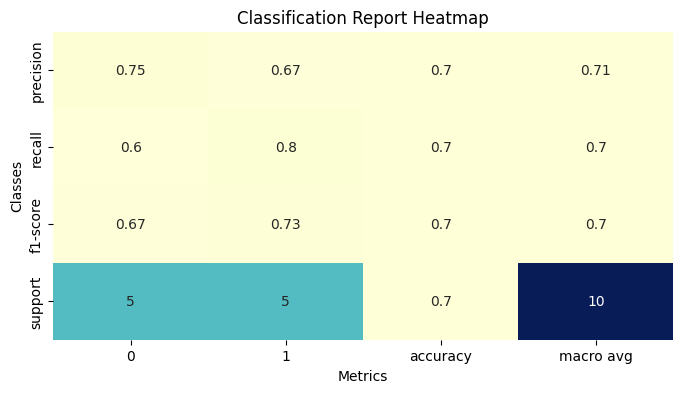

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report



# Generate classification report
report = classification_report(y_true, y_pred, output_dict=True)

# Convert the report to a DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu", cbar=False)
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

In [ ]:
# Improvement in accuracy of crime prediction from about 32.79% to 42.99%

In [ ]:
print ('Accuracy is', accuracy_score(y_test,y_pred_en)*100, '%')

Accuracy is 43.103448275862064 %


In [ ]:
# The feature importances
import numpy as np
X = np.random.rand(1000,12)
y = np.random.randint(0, 5, 1000)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X, y)
tree.feature_importances_

array([0.07574118, 0.07918306, 0.12342522, 0.08627919, 0.08169269,
       0.10378396, 0.08226015, 0.07858947, 0.06191107, 0.06537646,
       0.08710517, 0.07465238])

Feature: 0, Score: 0.07574
Feature: 1, Score: 0.07918
Feature: 2, Score: 0.12343
Feature: 3, Score: 0.08628
Feature: 4, Score: 0.08169
Feature: 5, Score: 0.10378
Feature: 6, Score: 0.08226
Feature: 7, Score: 0.07859
Feature: 8, Score: 0.06191
Feature: 9, Score: 0.06538
Feature: 10, Score: 0.08711
Feature: 11, Score: 0.07465


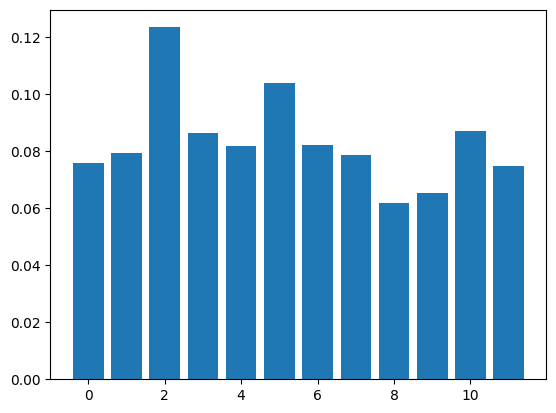

In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
importance = tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Get the feature importances
importances = clf.feature_importances_

# Print the top N most important features
N = 5  # Change this value to get more or fewer features
top_features = feature_importances_.head(N)['Feature'].tolist()
# Print the sorted features
top_features = feature_importances_['Feature'].tolist()
print("Sorted feature importance in ascending order:")
print(top_features)
print("Top", N, "most important features:")
print(top_features)

Sorted feature importance in ascending order:
['YEAR', 'MONTH', 'DAY', 'HOUR', 'NeighbourhoodID']
Top 5 most important features:
['YEAR', 'MONTH', 'DAY', 'HOUR', 'NeighbourhoodID']


In [ ]:
# K-Nearest Neighbour (KNN)

# Import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

y_pred

array(['Other Theft', 'Other Theft', 'Offence Against a Person', ...,
       'Other Theft', 'Theft from Vehicle', 'Theft from Vehicle'],
      dtype=object)

In [ ]:
knn.predict_proba(X_test)[:,0]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
knn.predict_proba(X_test)[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.3268


In [ ]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.5998


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.5998
Test set score: 0.3268


In [ ]:
# Rebuild kNN Classification model using k=1
# kNN model with k=1
knn_1 = KNeighborsClassifier(n_neighbors=1)


# fit the model to the training set
knn_1.fit(X_train, y_train)


# predict on the test-set
y_pred_1 = knn_1.predict(X_test)


print('Model accuracy score with k=1 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_1)))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model accuracy score with k=1 : 0.3240


In [ ]:
# Rebuild kNN Classification model using k=5
# kNN model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)


# predict on the test-set
y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model accuracy score with k=5 : 0.3622


In [ ]:
# Rebuild kNN Classification model using k=6
# kNN model with k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(X_train, y_train)


# predict on the test-set
y_pred_6 = knn_6.predict(X_test)


print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model accuracy score with k=6 : 0.3688


In [ ]:
# Rebuild kNN Classification model using k=9
# kNN model with k=9
knn_9 = KNeighborsClassifier(n_neighbors=9)


# fit the model to the training set
knn_9.fit(X_train, y_train)


# predict on the test-set
y_pred_9 = knn_9.predict(X_test)


print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model accuracy score with k=9 : 0.3870


In [ ]:
# For KNN, when the value of k was changed from k=1, k=5, k=6, k=9, the accuracy of prediction ranged from around 33%-39%

In [ ]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(y_test,y_pred_gn)*100, '%')

Accuracy is 43.13685184233517 %


In [ ]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(y_test,y_pred_en)*100, '%')

Accuracy is 43.103448275862064 %


In [ ]:
from sklearn.metrics import f1_score
print (f1_score(y_test,y_pred,
average='weighted'))

0.3207053934162119


In [ ]:
from sklearn.metrics import classification_report
target_names= ['TYPE','MONTH','YEAR','DATE','NEIGHBOURHOOD','DAY','HOUR','HUNDRED_BLOCK','NEIGHBOURHOOD','DAY_OF_WEEK','CATEGORY']
print(classification_report(y_test, y_pred, target_names=target_names))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



               precision    recall  f1-score   support

         TYPE       0.13      0.26      0.17      2458
        MONTH       0.19      0.30      0.23      4555
         YEAR       0.00      0.00      0.00        15
         DATE       0.18      0.20      0.19      5118
NEIGHBOURHOOD       1.00      1.00      1.00      3995
          DAY       0.21      0.19      0.20      3828
         HOUR       0.41      0.37      0.39     12659
HUNDRED_BLOCK       0.11      0.03      0.05      1879
NEIGHBOURHOOD       0.16      0.05      0.08      2838
  DAY_OF_WEEK       0.00      0.00      0.00        24
     CATEGORY       0.07      0.01      0.02      1549

     accuracy                           0.33     38918
    macro avg       0.22      0.22      0.21     38918
 weighted avg       0.33      0.33      0.32     38918



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Gaussian Naive Bayes



In [ ]:
#Feature Engineering to encode categorical variables

# First check the shape of X_train and X_test

X_train.shape, X_test.shape



((116752, 5), (38918, 5))

In [ ]:
# Check the data types
crimedata.dtypes

YEAR                        int64
MONTH                       int64
DAY                         int64
HUNDRED_BLOCK              object
X                         float64
Y                         float64
DATE               datetime64[ns]
DAY_OF_WEEK                 int64
CATEGORY                   object
DayOfWeek                  object
DayOfWeekID                 int64
NeighbourhoodID             int64
CrimeTypeID                 int64
Incident                    int64
Theft                      object
dtype: object

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train,y_train)

# Predict for test set
y_pred = GNB.predict(X_test)
print(classification_report(y_test,y_pred))

print("Precision Score : ",precision_score(y_test,y_pred,
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test,y_pred,
                                           pos_label='positive',
                                           average='micro'))
print(f1_score(y_test,y_pred,average='micro'))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

                                                        precision    recall  f1-score   support

                            Break and Enter Commercial       0.00      0.00      0.00      2458
                     Break and Enter Residential/Other       0.00      0.00      0.00      4555
                                              Homicide       0.00      0.00      0.00        15
                                              Mischief       0.19      0.00      0.00      5118
                              Offence Against a Person       1.00      1.00      1.00      3995
                                           Other Theft       0.42      0.01      0.02      3828
                                    Theft from Vehicle       0.36      1.00      0.53     12659
                                      Theft of Bicycle       0.00      0.00      0.00      1879
                                      Theft of Vehicle       0.00      0.00      0.00      2838
Vehicle Collision or Pedestrian Struck 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.



Recall Score :  0.4280281617760419
0.42802816177604186


In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.4280


In [ ]:
# Further Feature engineering by removing some categorical features
crimedataRandomF = crimedata
crimedata.drop(['DAY_OF_WEEK'], axis = 1, inplace=True)
crimedata.drop(['CATEGORY'], axis = 1, inplace=True)
crimedata.head()


,YEAR,MONTH,DAY,HUNDRED_BLOCK,X,Y,DATE,DayOfWeek,DayOfWeekID,NeighbourhoodID,CrimeTypeID,Incident,Theft
2003-05-12,2003,5,12,9XX TERMINAL AVE,493906.5,5457452.47,2003-05-12,Monday,0,21,6,1,1
2003-05-07,2003,5,7,9XX TERMINAL AVE,493906.5,5457452.47,2003-05-07,Wednesday,2,21,6,1,1
2003-04-23,2003,4,23,9XX TERMINAL AVE,493906.5,5457452.47,2003-04-23,Wednesday,2,21,6,1,1
2003-04-20,2003,4,20,9XX TERMINAL AVE,493906.5,5457452.47,2003-04-20,Sunday,6,21,6,1,1
2003-04-12,2003,4,12,9XX TERMINAL AVE,493906.5,5457452.47,2003-04-12,Saturday,5,21,6,1,1


In [ ]:
# Accuracy is 42.52%.
# Feature engineering is used to improve the accuracy of prediction of GNB model; drop some columns which are not numerical including Hundred_block, Day_of_week



In [ ]:
# Encode variables of column 'Category'
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# Define data
crimedata = asarray([['Break and Enter'], ['Theft'], ['Others'],['Mischief'], ['Vehicle Collision']])
print(crimedata)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(crimedata)
print(result)


[['Break and Enter']
 ['Theft']
 ['Others']
 ['Mischief']
 ['Vehicle Collision']]
[[0.]
 [3.]
 [2.]
 [1.]
 [4.]]


In [ ]:
# Modelling Gaussian Naive Bayes classifier on the train set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB()

In [ ]:
# Modelling Gaussian Naive Bayes classifier on the test set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Fit the model
gnb.fit(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.4280


In [ ]:
# Prediction with GNB using train set
y_pred_train = gnb.predict(X_train)
y_pred_train

array(['Theft from Vehicle', 'Theft from Vehicle',
       'Offence Against a Person', ..., 'Theft from Vehicle',
       'Theft from Vehicle', 'Theft from Vehicle'], dtype='<U54')

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.4259


In [ ]:
# Show accuracy scores on train and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.4259
Test set score: 0.4268


In [ ]:
# The GNB accuracy of prediction is 42.54% for train set and 42.56% for test set and as these values are close, there is no overfitting

In [ ]:
# Determine how well GNB performed by comparing the model's accuracy with Null accuracy which is the accuracy obtained by predicting the most frequent class(crime type)
# Check class distribution in test set

y_test.value_counts()

TYPE                                                  
Theft from Vehicle                                        12659
Mischief                                                   5118
Break and Enter Residential/Other                          4555
Offence Against a Person                                   3995
Other Theft                                                3828
Theft of Vehicle                                           2838
Break and Enter Commercial                                 2458
Theft of Bicycle                                           1879
Vehicle Collision or Pedestrian Struck (with Injury)       1549
Vehicle Collision or Pedestrian Struck (with Fatality)       24
Homicide                                                     15
dtype: int64

In [ ]:
# The crime type with highest frequency is Theft from Vehicle so calculate Null accuracy for comparison
null_accuracy = (34126/(34126+14286+12225+10924+10368+7710+6746+5052+4353+53+38))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.3223


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
import sys

# Normalize the data using sklearn StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

# Transform and display the training data
X_standardized = scaler.transform(X_train)


In [ ]:
# Accuracy of the model is 42.52% while the Null accuracy is 32%, therefore the model did a fairly good job in prediction. To improve the accuracy of GNB, hyperparameter tuning is not the method to apply, but feature engineering like combining variables can be effective:

In [ ]:
def create_model(learn_rate, dropout_rate):
    # Create model
    model = Sequential()
    model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    adam = Adam(lr=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn=create_model, verbose=1)

<ipython-input-131-7ac96faf49f7>:16: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



In [ ]:
# Define the parameters that you wish to use in your Grid Search along
# with the list of values that you wish to try out
learn_rate = [0.001, 0.02, 0.2]
dropout_rate = [0.0, 0.2, 0.4]
batch_size = [10, 20, 30]
epochs = [1, 5, 10]

seed = 42

# Make a dictionary of the grid search parameters
param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate, batch_size=batch_size, epochs=epochs )

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid,
                    cv=KFold(random_state=None), verbose=10)

grid_results = grid.fit(X_standardized, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5; 1/81] START batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



[CV 1/5; 1/81] END batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001;, score=nan total time=   0.5s
[CV 2/5; 1/81] START batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001
[CV 2/5; 1/81] END batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001;, score=nan total time=   0.2s
[CV 3/5; 1/81] START batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001
[CV 3/5; 1/81] END batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001;, score=nan total time=   0.2s
[CV 4/5; 1/81] START batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001
[CV 4/5; 1/81] END batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001;, score=nan total time=   0.1s
[CV 5/5; 1/81] START batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001
[CV 5/5; 1/81] END batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001;, score=nan total time=   0.1s
[CV 1/5; 2/81] START batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02.
[CV 1/5; 2/81] END batch_size=10, dropout_rat

KeyboardInterrupt: ignored

In [ ]:


# Normalize the data using sklearn StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

# Transform and display the training data
X_standardized = scaler.transform(X)

data = pd.DataFrame(X_standardized)
# Declare parameter values
dropout_rate = 0.1
epochs = 1
batch_size = 20
learn_rate = 0.001




In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logReq=LogisticRegression()
logReq.fit(X_train,y_train)
logReq.score(X_test,y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.42792538157150933

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logReq, X_test, y_test, cv=8)
print('Cross-Validation Accuracy Scores', scores)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model

Cross-Validation Accuracy Scores [0.42795478 0.42795478 0.42795478 0.42795478 0.42795478 0.42774923
 0.42783717 0.42578125]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.42578125, 0.427642693176286, 0.4279547790339157)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
scaled_data = scaler.transform(X_test)

# print scaled data
print(scaled_data)

[[-471.02435411   -2.31069896   -1.71919906   -0.84607918   -1.42167454]
 [-471.18941373   -1.61935759   -1.90183556   -0.8516523    -1.59668466]
 [-471.57455286   -1.96502827   -1.94097196   -0.73043707   -1.38667251]
 ...
 [-470.80427461   -2.13786361   -1.60178988   -0.84050607   -1.59668466]
 [-470.91431436   -1.79219293   -1.87574463   -0.86976492   -1.59668466]
 [-471.40949323   -2.39711663   -1.8887901    -0.84747246   -1.56168263]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Feature: 0, Score: -0.00757
Feature: 1, Score: -0.01474
Feature: 2, Score: -0.00679
Feature: 3, Score: -2.56345
Feature: 4, Score: -0.12873
           Feature  Feature of Importance
0             YEAR               0.115874
1            MONTH               0.199838
2              DAY               0.357917
3             HOUR               0.275630
4  NeighbourhoodID               0.050740


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<Axes: title={'center': 'Feature Importance'}, xlabel='Coefficient'>

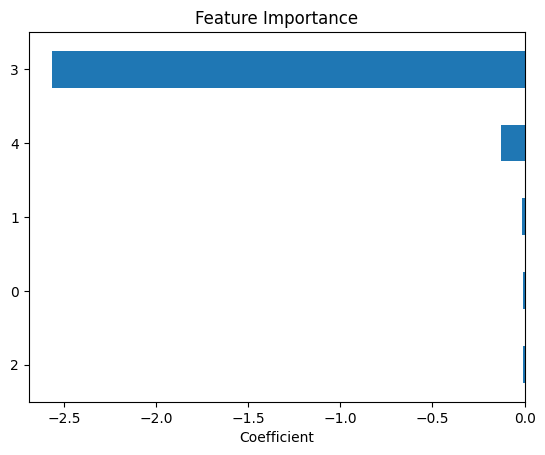

In [ ]:
logReq.fit(X_train,y_train)
importance = logReq.coef_[0]
#summarizing feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

print(feature_importances_.head())
#importance is a list so plotting it:
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh', title = 'Feature Importance', xlabel = 'Coefficient')


<Axes: xlabel='index', ylabel='score'>

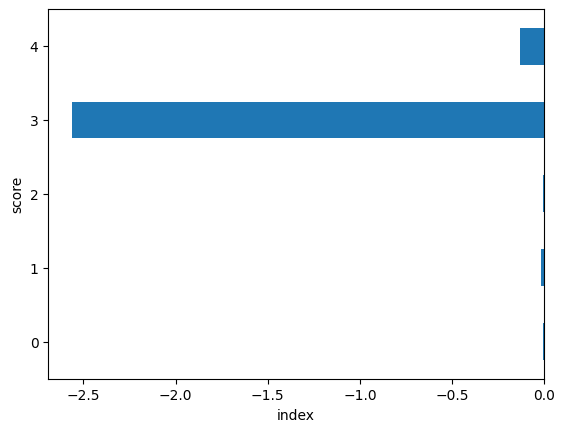

In [ ]:
feat_importances.head().plot(kind='barh', xlabel = 'index', ylabel = 'score')

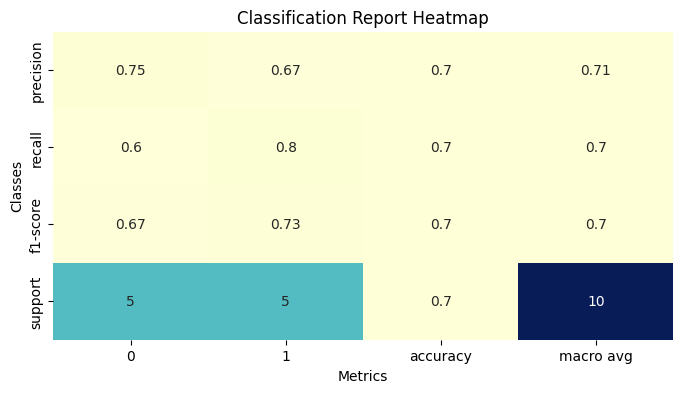

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Assuming you have true labels and predicted labels
y_true = [0, 1, 1, 0, 1, 0, 0, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1, 1, 1]

# Generate classification report
report = classification_report(y_true, y_pred, output_dict=True)

# Convert the report to a DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu", cbar=False)
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

In [ ]:
#Multilayer Perceptron (MP) Neural Network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

# Train MLP on training data
mlp.fit(X_train, y_train)

# Make predictions on test data
y_pred = mlp.predict(X_test)


In [ ]:
# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,y_pred)

In [ ]:

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(mlp, X_test, y_test, cv=5)

# Print average accuracy and standard deviation of accuracy across folds
print("Average accuracy:", scores.mean())
print("Accuracy standard deviation:", scores.std())

In [ ]:
# Improving accuracy of MLP Neural Network by changing the Learning Rate
from sklearn.neural_network import MLPClassifier

# Create MLP classifier object with 2 hidden layers of 10 neurons each and a learning rate of 0.01
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), learning_rate_init=0.01, solver='adam')

# Train MLP on training data
mlp.fit(X_train, y_train)

# Make predictions on test data
y_pred = mlp.predict(X_test)
# Calcuate accuracy
accuracy_score(y_test,y_pred)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.activations import relu

In [ ]:
# Initialize the model
model = Sequential([
    Dense(64, activation=relu, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(32, activation=relu),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
model.evaluate(X_test, y_test)

In [ ]:
#Improving accuracy of MLP Neural Network by increasing the neuron number
from sklearn.neural_network import MLPClassifier

# Create MLP classifier object with 3 hidden layers of 30 neurons each
mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30))

# Train MLP on training data
mlp.fit(X_train, y_train)

# Make predictions on test data
y_pred = mlp.predict(X_test)